In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.1 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d gpreda/all-covid19-vaccines-tweets


Dataset URL: https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets
License(s): CC0-1.0


In [ ]:
!ls

all-covid19-vaccines-tweets.zip  kaggle.json  sample_data


In [ ]:
dataset_zip = 'all-covid19-vaccines-tweets.zip'
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('vaccine-tweets')


In [ ]:
df = pd.read_csv('vaccine-tweets/vaccination_all_tweets.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [ ]:
#Removing https links and emojies
df = df.map(lambda x: re.sub(r'https?://\S+', '', str(x)))
df = df.map(lambda x: emoji.demojize(x))

In [ ]:
df_2 = df['text'].str.lower()
df_2

,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,"facts are immutable, senator, even when you're..."
4,explain to me again why we need a vaccine @bor...
...,...
228202,45+ #urban #bengaluru #covidvaccine availabili...
228203,18-44 #bbmp #bengaluru #covidvaccine availabil...
228204,18-44 #urban #bengaluru #covidvaccine availabi...
228205,they promote their vaccines leaving out the st...


In [ ]:
import string
punctuation_removal = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation_removal))
df_2 = df_2.apply(lambda text: remove_punctuation(text))
df_2

,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts are immutable senator even when youre no...
4,explain to me again why we need a vaccine bori...
...,...
228202,45 urban bengaluru covidvaccine availability f...
228203,1844 bbmp bengaluru covidvaccine availability ...
228204,1844 urban bengaluru covidvaccine availability...
228205,they promote their vaccines leaving out the st...


In [ ]:
df_2 = df_2.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))


In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_2 = df_2.apply(lambda text: remove_stopwords(text))
df_2


,text
0,folks said daikon paste could treatcytokine st...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain needvaccine borisjohnson matthancock w...
...,...
228202,45 urban bengaluru covidvaccine availability 1...
228203,1844 bbmp bengaluru covidvaccine availability ...
228204,1844 urban bengaluru covidvaccine availability...
228205,promote vaccines leaving stronger russia vacci...


In [ ]:
from collections import Counter
cnt = Counter()
for text in df_2.values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('covaxin', 73396),
 ('vaccine', 51303),
 ('moderna', 46816),
 ('slots', 35471),
 ('dose', 30485),
 ('covid19', 29506),
 ('age', 25404),
 ('18', 21753),
 ('pfizer', 14317),
 ('bbmp', 14206)]

In [ ]:
df_2 = pd.DataFrame(df_2)
nltk.download('punkt_tab')
df_2['num_words']=df_2['text'].apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df_2

,text,num_words
0,folks said daikon paste could treatcytokine st...,8
1,world wrong side history year hopefully bigges...,11
2,coronavirus sputnikv astrazeneca pfizerbiontec...,12
3,facts immutable senator even youre ethically s...,12
4,explain needvaccine borisjohnson matthancock w...,6
...,...,...
228202,45 urban bengaluru covidvaccine availability 1...,14
228203,1844 bbmp bengaluru covidvaccine availability ...,12
228204,1844 urban bengaluru covidvaccine availability...,14
228205,promote vaccines leaving stronger russia vacci...,7


In [ ]:
from textblob import TextBlob

nltk.download('vader_lexicon')

def analyze_sentiment(text):
    blob = TextBlob(text)
    textblob_polarity = blob.sentiment.polarity

    return textblob_polarity

df_2['polarity'] = df_2['text'].apply(analyze_sentiment)
average_polarity = df_2.groupby('text')['polarity'].mean().reset_index()
average_polarity

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,polarity
0,0 brain cells 100 vaccinated 2nd shot checkmar...,0.00
1,0 effectivenessmean 0 zero 6 months covid19 70...,0.00
2,0 efficacy loudlycryingfaceloudlycryingfacelou...,0.00
3,0 justcall modiji enough next day modiji took ...,0.00
4,0 problem cppinvestments ceo flying 2 uae 4 sp...,0.00
...,...,...
213347,𝙸𝚏 𝚢𝚘𝚞 𝚑𝚊𝚟𝚎 𝚟𝚊𝚌𝚌𝚒𝚗𝚊𝚝𝚎𝚍 𝚍𝚘 𝚕𝚎𝚝 𝚞𝚜 𝚔𝚗𝚘𝚠 𝚠𝚑𝚒𝚌𝚑 𝚟𝚊...,0.00
213348,𝚅𝚎𝚛𝚢 𝚐𝚘𝚘𝚍♡ sinopharmsyringemicrobe,0.00
213349,𝟭𝟱𝟬 𝗠𝗜𝗟𝗟𝗜𝗢𝗡 𝗔𝗠𝗘𝗥𝗜𝗖𝗔𝗡𝗦 𝗣𝗢𝗜𝗦𝗢𝗡𝗘𝗗 𝗕𝗬 𝗧𝗢𝗫𝗜𝗖 𝗩𝗔𝗖𝗖𝗜𝗡...,0.00
213350,𝟿𝟶𝟿 𝚘𝚏 𝟸𝟻𝟺𝟾 𝚍𝚘𝚜𝚎𝚜 manilacovid19 sinovac,0.00


In [ ]:
def get_sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

average_polarity['sentiment'] = average_polarity['polarity'].apply(get_sentiment)
average_polarity

,text,polarity,sentiment
0,0 brain cells 100 vaccinated 2nd shot checkmar...,0.00,Neutral
1,0 effectivenessmean 0 zero 6 months covid19 70...,0.00,Neutral
2,0 efficacy loudlycryingfaceloudlycryingfacelou...,0.00,Neutral
3,0 justcall modiji enough next day modiji took ...,0.00,Neutral
4,0 problem cppinvestments ceo flying 2 uae 4 sp...,0.00,Neutral
...,...,...,...
213347,𝙸𝚏 𝚢𝚘𝚞 𝚑𝚊𝚟𝚎 𝚟𝚊𝚌𝚌𝚒𝚗𝚊𝚝𝚎𝚍 𝚍𝚘 𝚕𝚎𝚝 𝚞𝚜 𝚔𝚗𝚘𝚠 𝚠𝚑𝚒𝚌𝚑 𝚟𝚊...,0.00,Neutral
213348,𝚅𝚎𝚛𝚢 𝚐𝚘𝚘𝚍♡ sinopharmsyringemicrobe,0.00,Neutral
213349,𝟭𝟱𝟬 𝗠𝗜𝗟𝗟𝗜𝗢𝗡 𝗔𝗠𝗘𝗥𝗜𝗖𝗔𝗡𝗦 𝗣𝗢𝗜𝗦𝗢𝗡𝗘𝗗 𝗕𝗬 𝗧𝗢𝗫𝗜𝗖 𝗩𝗔𝗖𝗖𝗜𝗡...,0.00,Neutral
213350,𝟿𝟶𝟿 𝚘𝚏 𝟸𝟻𝟺𝟾 𝚍𝚘𝚜𝚎𝚜 manilacovid19 sinovac,0.00,Neutral


In [ ]:
sentiment_counts = average_polarity['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
Neutral,126620
Positive,67230
Negative,19502


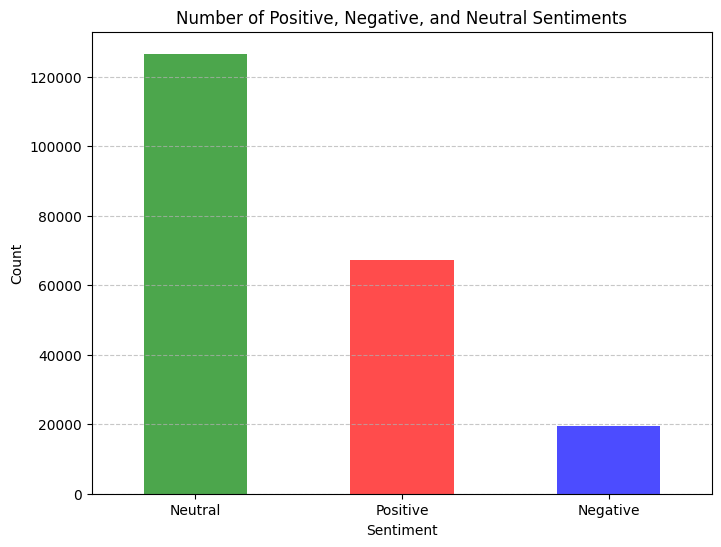

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Number of Positive, Negative, and Neutral Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores
df_3 = pd.DataFrame(df_2['text'])
df_3['sentiment'] = df_3['text'].apply(analyze_sentiment)
df_3.head()

,text,sentiment
0,folks said daikon paste could treatcytokine st...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,world wrong side history year hopefully bigges...,"{'neg': 0.209, 'neu': 0.608, 'pos': 0.182, 'co..."
2,coronavirus sputnikv astrazeneca pfizerbiontec...,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp..."
3,facts immutable senator even youre ethically s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,explain needvaccine borisjohnson matthancock w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
# Separate 'neg', 'neu', and 'pos' values from each cell in 'sentiment_scores' column
df_3['neg'] = df_3['sentiment'].apply(lambda x: x['neg'])
df_3['neu'] = df_3['sentiment'].apply(lambda x: x['neu'])
df_3['pos'] = df_3['sentiment'].apply(lambda x: x['pos'])
df_3['tot'] = df_3['sentiment'].apply(lambda x:x['compound'])
# Drop the original 'sentiment_scores' column
df_3.drop('sentiment', axis=1, inplace=True)
df_3

,text,neg,neu,pos,tot
0,folks said daikon paste could treatcytokine st...,0.000,1.000,0.000,0.0000
1,world wrong side history year hopefully bigges...,0.209,0.608,0.182,-0.1027
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.846,0.154,0.2500
3,facts immutable senator even youre ethically s...,0.000,1.000,0.000,0.0000
4,explain needvaccine borisjohnson matthancock w...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
228202,45 urban bengaluru covidvaccine availability 1...,0.000,0.798,0.202,0.5106
228203,1844 bbmp bengaluru covidvaccine availability ...,0.000,0.769,0.231,0.5106
228204,1844 urban bengaluru covidvaccine availability...,0.000,0.798,0.202,0.5106
228205,promote vaccines leaving stronger russia vacci...,0.000,0.490,0.510,0.6369


In [ ]:
neg_total_avg = (df_3['neg'].sum())/len(df_3.index)
print(neg_total_avg)
pos_total_avg = (df_3['pos'].sum())/len(df_3.index)
print(pos_total_avg)
neu_total_avg = (df_3['neu'].sum())/len(df_3.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]


0.042301436853383105
0.10097762119479242
0.856722493175056


In [ ]:
df_3['date'] = pd.to_datetime(df['date']).dt.date

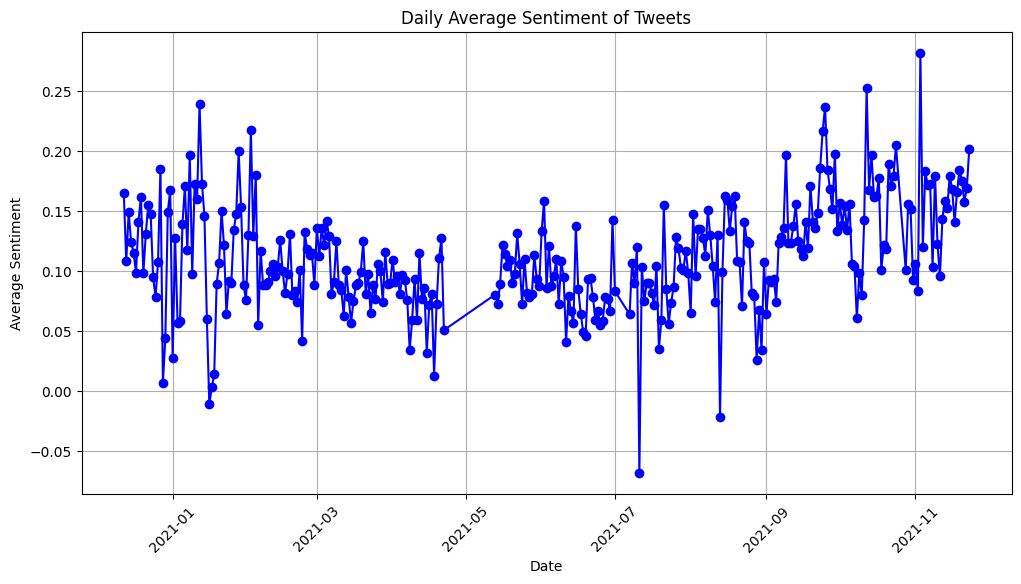

In [ ]:
daily_sentiment = df_3.groupby('date')['tot'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

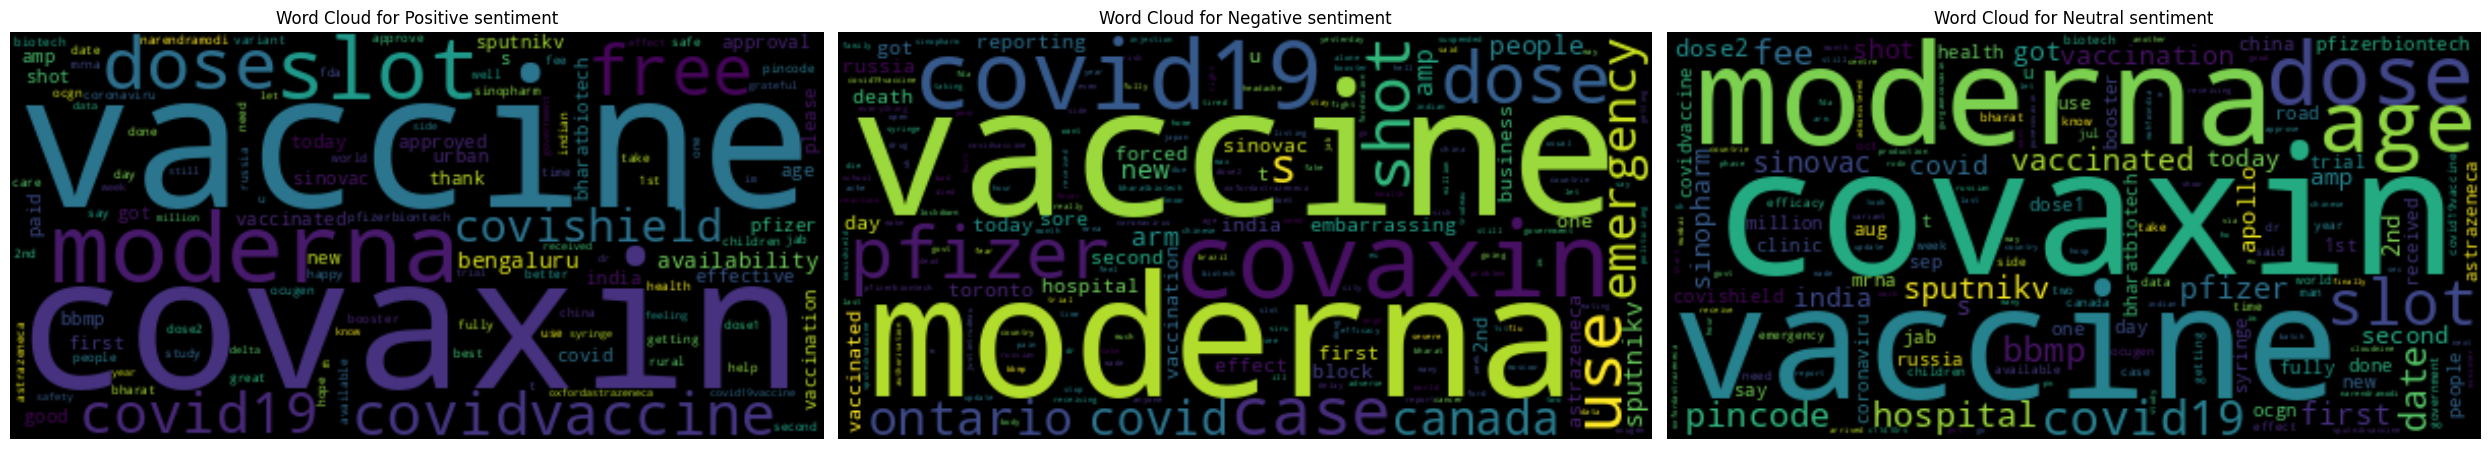

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 3, figsize=(25, 10))
sentiments = ["Positive", "Negative", "Neutral"]

for i, sentiment in enumerate(sentiments):
    if sentiment == "Positive":
        opinion = ' '.join(df_3[df_3['tot'] > 0.3]['text'])
    elif sentiment == "Negative":
        opinion = ' '.join(df_3[df_3['tot'] < -0.3]['text'])
    else:  # Neutral
        opinion = ' '.join(df_3[(df_3['tot'] >= -0.3) & (df_3['tot'] <= 0.3)]['text'])

    ax = axes[i]
    wordcloud = WordCloud(max_words=2000, width=400, height=200, collocations=False).generate(opinion)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Word Cloud for {sentiment} sentiment")

plt.tight_layout()
plt.show()

In [ ]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english',device=device, batch_size=64, truncation=True)

# Apply the pipeline to the 'review' column

df_4 = pd.DataFrame(df_2['text'])

results = sentiment_analyzer(df_4['text'].tolist())

# Add results to new DataFrame columns
df_4['sentiment'] = [result['label'] for result in results]
df_4['score'] = [result['score'] for result in results]
df_4

Device set to use cuda:0


,text,sentiment,score
0,folks said daikon paste could treatcytokine st...,NEGATIVE,0.989862
1,world wrong side history year hopefully bigges...,POSITIVE,0.984685
2,coronavirus sputnikv astrazeneca pfizerbiontec...,NEGATIVE,0.984730
3,facts immutable senator even youre ethically s...,POSITIVE,0.991852
4,explain needvaccine borisjohnson matthancock w...,NEGATIVE,0.987338
...,...,...,...
228202,45 urban bengaluru covidvaccine availability 1...,NEGATIVE,0.978610
228203,1844 bbmp bengaluru covidvaccine availability ...,NEGATIVE,0.977730
228204,1844 urban bengaluru covidvaccine availability...,NEGATIVE,0.976417
228205,promote vaccines leaving stronger russia vacci...,NEGATIVE,0.925020


In [ ]:
sentiment_counts = df_4['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
NEGATIVE,189041
POSITIVE,39166


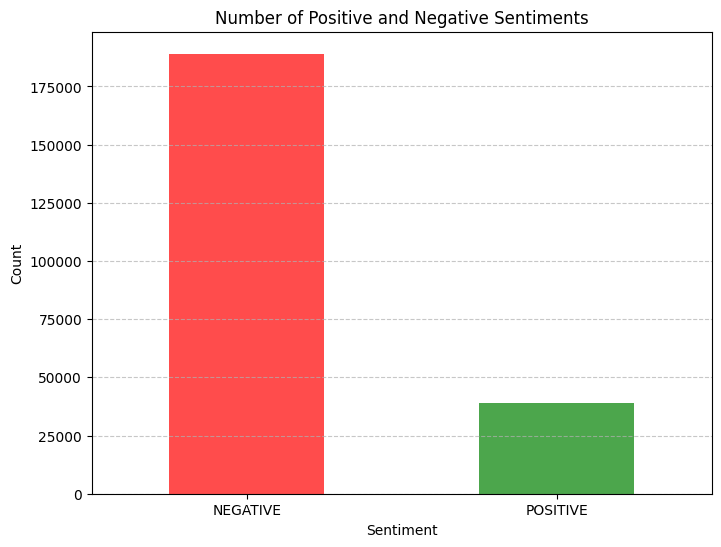

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Number of Positive and Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()